# SuperPlots 

SuperPlots are an enhanced way to visualize experimental data that combines individual data points with summary statistics. 
This approach was introduced in a 2020 paper by Lord et al. to address common issues in data visualization in biological sciences, but the concept is valuable across many fields.

# This visualization approach helps readers better understand:

-The distribution of individual measurements

-The variation between replicates

-The overall treatment effects and their reliability


# SuperPlots are particularly valuable for:

-Small sample sizes

-Hierarchical experimental designs

-Data with high variability

-Identifying potential outliers or unusual patterns

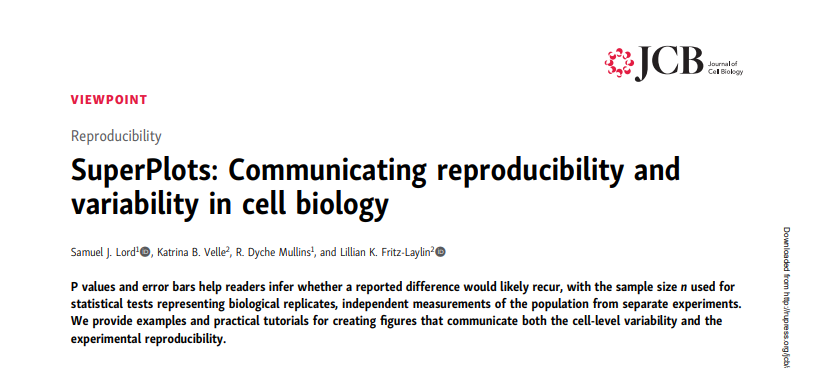


https://doi.org/10.1083/jcb.202001064


## Try to reproduce the plot shown in figure S5 of the paper. 
All information needed is in the figure legend.
I have alreay downloaded the data used in the figure for you :
'data_for_superplot_JCB_paper.csv'


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


Text(0.5, 60.22755, 'P = 0.015')

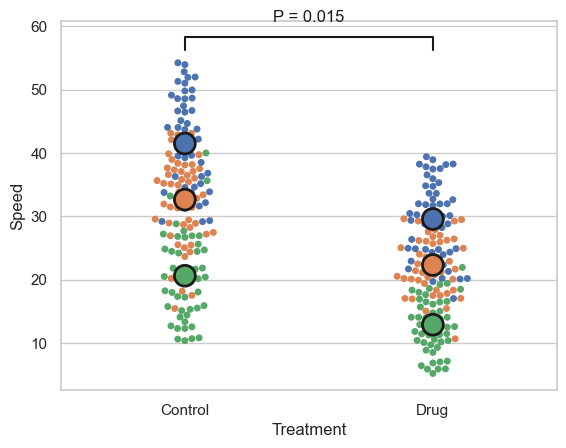

In [2]:
combined = pd.read_csv("data_for_superplot_JCB_paper.csv")
sns.set(style="whitegrid")
ReplicateAverages = combined.groupby(['Treatment','Replicate'], as_index=False).agg({'Speed': "mean"})
ReplicateAvePivot = ReplicateAverages.pivot_table(columns='Treatment', values='Speed', index="Replicate")
statistic, pvalue = stats.ttest_rel(ReplicateAvePivot['Control'], ReplicateAvePivot['Drug']) 
P_value = str(float(round(pvalue, 3)))
sns.swarmplot(x="Treatment", y="Speed", hue="Replicate", data=combined)
ax = sns.swarmplot(x="Treatment", y="Speed", hue="Replicate", size=15, edgecolor="k", linewidth=2, data=ReplicateAverages) 
ax.legend_.remove()
x1, x2 = 0, 1; y, h, col = combined['Speed'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h*2, "P = "+P_value, ha='center', va='bottom', color=col)